# Logistic Regression 

In the assignment, you will use gradient ascent to find the weights for the logistic regression.   

As an example, we will use the widely-used breast cancer data set.  This data set is described here:

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin


## Requirement 1-2:  Getting, preprocessing, and understanding the dataset

### Importing the standard libraries

In [0]:
# Importing important libraries
# Import breastcancer dataset
# Import preprocessing from sklearn
# Import train_test_split from sklearn
# Import numpy,math
import numpy as np
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.linear_model
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import collections


### Importing the dataset

In [2]:
# Load dataset to a python variable cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


###Exploration of the Data Set

In [3]:
print("Shape of the data set: ")
print(cancer.data.shape)
print("Actual Data Set: ")
print(cancer.data)

Shape of the data set: 
(569, 30)
Actual Data Set: 
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [4]:
print("Features of the data set to run logistic regression on: ")
cancer.feature_names

Features of the data set to run logistic regression on: 


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
print("Description of the data set")
cancer.DESCR

Description of the data set


'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [6]:
# Store target to a variable called y
# Store feature to a variable called X
# Printing the shape of data (X) and target (Y) values 
# print(X.shape)
# print(y.shape)
X = cancer.data
y = cancer.target
print(X.shape)
print(y.shape)


(569, 30)
(569,)


### Data Pre-Processing
#### Splitting the data into train and test before scaling the dataset


In [0]:
# Use train_test_split() function to split the dataset
# Store the return value of pervious step to X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X,y)

#### Scale the data since we will be using gradient ascent

In [0]:
# Find the scaler of the dataset by using preprocessing.StandardScaler().fit()
# Using this scale to scale the X_train and X_test using .transform()
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# TODO - Print the shape of x_train and y_train 
print(X_train.shape) # It should print (426, 30)
print(y_train.shape) # It should print (426,)

(426, 30)
(426,)


#### Adding a column of ones to the  matrices $X_{train}$ and  $X_{test}$
After adding a column of ones $X_{train}=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$

Similarly for $X_{test}$

In [10]:
# Append a column of ones to x_train 

# Create a column vector of ones by using np.ones and reshape
# Append a column of ones in the beginning of x_train by using np.hstack
bias_train = np.ones((X_train.shape[0],1))
X_train = np.c_[bias_train, X_train]

# Now do the same for the test data
bias_test = np.ones((X_test.shape[0],1))
X_test = np.c_[bias_test,X_test]
# We can check that everything worked correctly by:
# Printing out the new dimensions
print("The trainng data has dimensions: ", X_train.shape, ". The testing data has dimensions: ",X_test.shape)
# # Looking at the first two rows of X_train to check everything worked as expected
print(X_train[23][0])

The trainng data has dimensions:  (426, 31) . The testing data has dimensions:  (143, 31)
1.0



 Before writing the gradient ascent code, first write some helpful functions


 
### Sigmoid($z$)
The first function you will write is sigmoid($z$)

sigmoid($z$) takes as input a column vector of real numbers, $z^T = [z_1, z_2, ..., z_{N'}]$, where $N'$ is the number of  examples

It should produce as output a column vector $\left[\frac{1}{1+e^{-z_1}},\frac{1}{1+e^{-z_2}},...,\frac{1}{1+e^{-z_{N'}}}\right]^T$

In [0]:
# Write the sigmoid function
def sigmoid(z):
  sigmoid =(1 / (1+np.exp(-z))) 
  
  return sigmoid


### Initializing ${\bf w}$
For testing the next functions, we create a coefficient vector, ${\bf w}$.
We will initialize the coeffients to be $0$, i.e. ${\bf w}^T = [0,0,\ldots ,0]$ (We could have initialized ${\bf w}$ to any values.)

In [12]:
# Initialize w to random values
w = np.empty((X_train.shape[1],1))
print(w)

[[2.78275479e-316]
 [1.00295326e-321]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [1.16095484e-028]
 [4.81784283e+116]
 [6.64916189e+246]
 [7.13227388e-154]
 [2.88645119e+214]
 [2.43813713e-152]
 [1.65172550e-076]
 [6.96770842e+252]
 [7.33955251e+223]
 [9.47069281e-154]
 [4.63362101e+228]
 [7.35874553e+223]
 [2.34617775e-110]
 [6.19522232e+223]
 [5.03734623e+180]
 [1.54722523e+262]
 [7.48952651e+247]
 [8.76739466e+252]
 [8.89489936e+252]
 [5.54175225e+257]
 [6.02182527e+151]
 [9.30537465e+199]
 [2.20835466e-094]
 [5.50028887e+247]
 [2.15799222e+243]
 [4.06021814e-317]]


### Our hypothesis, $h({\bf x})$
The next  function to write is our hypothesis function. 

For example if our design matrix $X$ consists of single example $X=[1,x_1,x_2,\ldots,x_d]$ and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, it returns $h({\bf x})=\frac{1}{1+e^{-\left({w_{0}\cdot 1 +w_1\cdot x_1+\cdots w_d\cdot x_d}\right)}}$

If given a  matrix consisting of $N'$ examples 
$X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, the function returns a column vector
$[h({\bf x}^{(1)}),h({\bf x}^{(2)},\ldots, h({\bf x}^{(N')}]^T$

In [0]:
# Predict the probability that a patient has cancer 
# Write the hypothesis function 
def hypothesis(X , w):
  regression = np.dot(X,w)
  hypothesis_results = sigmoid (regression)
  return hypothesis_results

### Log-Likelihood Function.
Write the code to calculate the log likelihood function $\ell({\bf w})=
\sum_{i=1}^{N'}y^{(i)}\ln(h({\bf x}^{(i)})) +(1- y^{(i)})\ln(1-h({\bf x}^{(i)}))$

The input is a matrix consisting of $N'$ examples $X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and a column vector ${\bf y}^T=[y^{(1)},y^{(2)},\dots,y^{(N')}]$ of labels for $X$.

The output is $\ell({\bf w})$

In [0]:
# Write the log likelihood function 
def log_likelihood(X , y , w ):
  hyp = hypothesis(X,w)
  ll = y * np.log(hyp) + (1 - y)*np.log(1 - hyp)
  ll = np.sum(ll)
  ll = (1/X.shape[0]) * ll
  return ll

# Gradient Ascent
Now write the code to perform gradient ascent.  You will use the update rule from the lecture notes.

In [0]:
# TODO - Write the gradient ascent function 
def Logistic_Regresion_Gradient_Ascent(X, y, learning_rate, num_iters):
    # For every 100 iterations, store the log_likelihood for the current w
    
    # Initializing log_likelihood to be an empty list  
    log_likelihood_values = []
    # Initialize w to be a zero vector of shape x_train.shape[1],1
    w = np.zeros((X.shape[1],1))
    # Initialize N to the number of training examples
    N = X.shape[0]
    for i in range(num_iters):
      # append the log_likelihodd values to the list for every 100 iterations
      if( (i%100) == 0):
        log_likelihood_values.append(log_likelihood(X,y, w))
      hyp = hypothesis(X,w)
      gradient = (1/N)*np.dot(X.T,hyp-y)
      # update the w using formula 
      w = w - learning_rate*gradient      
        
    return w, log_likelihood_values


### Requirement 3 - 5
Run the machine learning algorithm of gradient descent to train the logistic regression model to define the best w (theta) whilst decreasing the log-likelihood values during training. The goal is to graph the results to see if the algorithm optimizes the weight values after every iteration. An initial learning rate of 0.5 is used so as to slowly reach the local maxima of the logistic regression after every step. This will be done for 5000 iterations, and the resulting weights will be printed.

In [16]:
# Set the learning_rate
learning_rate = 0.5
# Set the num_iters
num_iters = 5000
# Run the Logistic_Regresion_Gradient_Ascent() and store the returned values
w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_train, y_train.reshape(y_train.shape[0],1), learning_rate, num_iters)
print(w)
print(log_likelihood_values)

[[-1.26863962]
 [-0.0339327 ]
 [-0.31299746]
 [-0.03786036]
 [-0.51372388]
 [-0.90537516]
 [ 3.02758847]
 [-1.93987459]
 [-2.74731912]
 [ 0.4332944 ]
 [-1.5566888 ]
 [-3.22481251]
 [ 1.03846766]
 [-1.55548052]
 [-2.46908982]
 [-0.91140001]
 [ 2.23199949]
 [ 0.99012023]
 [-0.96824891]
 [ 1.87440739]
 [ 0.57040017]
 [-1.52003678]
 [-2.79065866]
 [-1.01185531]
 [-1.6902981 ]
 [ 0.77605115]
 [ 0.68593125]
 [-2.23434684]
 [-1.8201514 ]
 [-2.38903038]
 [-0.57907992]]
[-0.6931471805599453, -0.06298420519327187, -0.05526958509119422, -0.051563805209271084, -0.04916488378478631, -0.047386266892018344, -0.04596121995039131, -0.044761883458695556, -0.0437185403847242, -0.042789666302018456, -0.04194884897100166, -0.04117838449478257, -0.0404658687552489, -0.03980226493442874, -0.0391807535269424, -0.03859602227440168, -0.03804381546279217, -0.037520641695132494, -0.03702358070331408, -0.03655015270821759, -0.036098227438078764, -0.03566595844601606, -0.03525173384572956, -0.03485413805795657, -0.

# Requirement 7: Plotting Likelihood v/s Number of Iterations.
The resulting graph should increase through iterations  while the likelihood values decrease.

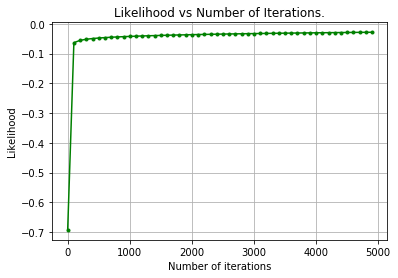

In [17]:
# Run this cell to plot Likelihood v/s Number of Iterations.
iters = np.array(range(0,num_iters,100))
plt.plot(iters,log_likelihood_values,'.-',color='green')
plt.xlabel('Number of iterations')
plt.ylabel('Likelihood')
plt.title("Likelihood vs Number of Iterations.")
plt.grid()

# Requirement 6: Evaluating your model
In order to evaluate the performance of the model, the metrics of precision, F1-score, and recall will be used to quantify the capacity of the model to predict breast cancer patients. A precision of 98%, a recall of 96%, and a F-1 score of  97.7% was obtained, which demonstrates the ability of the logistic model for prediction

In [18]:
# use hypothesis(...) to predict.


#Sanity cheecks to ensure everything is in the right shape
print(X_test.shape)
print(y_test.shape)
print(w.shape)

test_results = hypothesis(X_test, w)





(143, 31)
(143,)
(31, 1)


In [19]:
# cleaning the raw data points and transforming them to 0s and 1s
test_results[test_results > 0.5] = 1
test_results[test_results < 0.5] = 0

TP=0
FP=0
FN=0
TN=0
for i in range(y_test.shape[0]):
  if (y_test[i] == 0 and test_results [i] == 0):
    TN+=1
  elif (y_test[i] == 1 and test_results[i] == 1):
    TP+=1
  elif (y_test[i] == 1 and test_results[i] == 0):
    FN+=1
  elif (y_test[i] == 0 and test_results[i] == 1):
    FP+=1
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1 = (2* (precision*recall))/(precision+recall)
        
# calculate precision, recall and f1

print("Precision: ",str((precision*100))+"%")
print("Recall: ",str(recall*100)+"%")
print("F1: ",str(f1*100)+"%")
print("Confusion Matrix: ")
print("TP: ",TP," FN: ",FN," FP: ",FP," TN: ",TN)

Precision:  95.14563106796116%
Recall:  98.98989898989899%
F1:  97.02970297029702%
Confusion Matrix: 
TP:  98  FN:  1  FP:  5  TN:  39


###Requirement 8: Hyperparameter tuning
By doubling the number of times the gradient ascent algorithm was run as well as decreasing the learning rate, an increase of approximately 1-2% in our metrics that arise from the confusion matrix (precision,recall and f1-score) was obtained. This brings into light the importance of hyperparemeter turning in order to improve our machine learning algorithms.

In [20]:
# Set the learning_rate
learning_rate = 0.3
# Set the num_iters
num_iters = 10000
# Run the Logistic_Regresion_Gradient_Ascent() and store the returned values
w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_train, y_train.reshape(y_train.shape[0],1), learning_rate, num_iters)

test_results = hypothesis(X_test, w)

# cleaning the raw data points and transforming them to 0s and 1s
test_results[test_results > 0.5] = 1
test_results[test_results < 0.5] = 0

TP=0
FP=0
FN=0
TN=0
for i in range(y_test.shape[0]):
  if (y_test[i] == 0 and test_results [i] == 0):
    TN+=1
  elif (y_test[i] == 1 and test_results[i] == 1):
    TP+=1
  elif (y_test[i] == 1 and test_results[i] == 0):
    FN+=1
  elif (y_test[i] == 0 and test_results[i] == 1):
    FP+=1
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1 = (2* (precision*recall))/(precision+recall)
        
# calculate precision, recall and f1

print("Precision: ",str((precision*100))+"%")
print("Recall: ",str(recall*100)+"%")
print("F1: ",str(f1*100)+"%")
print("Confusion Matrix: ")
print("TP: ",TP," FN: ",FN," FP: ",FP," TN: ",TN)


Precision:  95.14563106796116%
Recall:  98.98989898989899%
F1:  97.02970297029702%
Confusion Matrix: 
TP:  98  FN:  1  FP:  5  TN:  39
